In [28]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from collections import Counter
import random
import sqlite3
import numpy as np


In [29]:

# Conectar ao banco de dados SQLite
conn = sqlite3.connect('prod/dados_final.db')

# Consulta SQL para selecionar os dados da tabela desejada
query = "SELECT * FROM vagas;"

# Ler os dados do banco de dados SQLite para um DataFrame do Pandas
dados = pd.read_sql_query(query, conn)

# Fechar a conexão com o banco de dados
conn.close()
# dados = pd.read_csv("linkedin_jobs.csv")


In [30]:
dados_tec = dados

In [13]:
dados_tec

,index,job_id,register_date,company,title,location,time_opened,link,applications,experience_level,job_type,role,sectors,description,requisitos,posicao
0,0,3837864590,2024-03-03,Deloitte,Desenvolvedor (a) Júnior - Brasil,"São Paulo, SP",Há 1 semana,https://br.linkedin.com/jobs/view/desenvolvedo...,>25,Assistente,Tempo integral,Engenharia e Tecnologia da informação,Atividades de consultoria em gestão empresarial,"DescriptionNa Deloitte, buscamos pessoas que q...",Não especificado,JUNIOR
1,1,3823911497,2024-03-03,Hiper Software,Desenvolvedor,Greater São Paulo Area,Há 2 semanas,https://br.linkedin.com/jobs/view/desenvolvedo...,Hidden,Assistente,Tempo integral,Engenharia e Tecnologia da informação,"Tecnologia, Informação e Internet",Vagas para os times de tecnologia e desenvolvi...,Não especificado,Não especificado
2,2,3760170978,2024-03-03,Casa do Crédito S.A. - SCM,Desenvolvedor MYSQL,Greater São Paulo Area,Há 3 meses,https://br.linkedin.com/jobs/view/desenvolvedo...,<=25,Assistente,Tempo integral,Engenharia e Tecnologia da informação,Sociedades de fomento mercantil - factoring,Manipular arquivos do servidor web. Criar scri...,"PHP, SQL",Não especificado
3,3,3841368287,2024-03-03,ZENVIA,Desenvolvedor(a) Backend Junior (Remoto),"São Paulo, SP",Há 1 dia,https://br.linkedin.com/jobs/view/desenvolvedo...,>25,Assistente,Tempo integral,Engenharia e Tecnologia da informação,"Tecnologia, Informação e Internet",Estamos entusiasmados em abrir a oportunidade ...,"CLOUD, DJANGO, NOSQL, AWS, NODE.JS, EXPRESS, P...",JUNIOR
4,4,3798755517,2024-03-03,Brivia | The Creative Smartech,Desenvolvedor(a) Front-End,"São Paulo, SP",Há 2 meses,https://br.linkedin.com/jobs/view/desenvolvedo...,Hidden,Assistente,Tempo integral,Engenharia e Tecnologia da informação,Atividades dos serviços de tecnologia da infor...,Sem descrição,Não especificado,Não especificado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,684,3817798912,2024-03-03,Garbo,Desenvolvedor Delphi,Greater São Paulo Area,Há 1 mês,https://br.linkedin.com/jobs/view/desenvolvedo...,Hidden,Assistente,Tempo integral,Engenharia e Tecnologia da informação,Fabricação de artigos para viagem e de artefat...,Experiências anteriores com desenvolvimento em...,"PL/SQL, DELPHI",Não especificado
685,685,3813671037,2024-03-03,Qintess,Desenvolvedor .Net / MCSA,"São Paulo, SP",Há 1 mês,https://br.linkedin.com/jobs/view/desenvolvedo...,Hidden,Assistente,Tempo integral,Engenharia e Tecnologia da informação,Atividades dos serviços de tecnologia da infor...,Sem descrição,.NET,Não especificado
686,686,3831452244,2024-03-03,Foursys,Desenvolvedor(a) de Front-end React - Sênior,Greater São Paulo Area,Há 2 semanas,https://br.linkedin.com/jobs/view/desenvolvedo...,>25,Pleno-sênior,Tempo integral,Tecnologia da informação,Atividades dos serviços de tecnologia da infor...,"A Foursys é um time apaixonado por inovação, d...","REACT, CSS, AWS",SÊNIOR
687,687,3839068670,2024-03-03,Cartos,Desenvolvedor JavaScript SENIOR - Vaga Presenc...,"São Paulo, SP",Há 4 dias,https://br.linkedin.com/jobs/view/desenvolvedo...,Hidden,Pleno-sênior,Tempo integral,Engenharia e Tecnologia da informação,Bancos,Sobre a empresa:A Cartos está no coração do me...,"CLOUD, NODE.JS, REACT, AWS, SQL, GRAPHQL, JAVA...",SÊNIOR


In [14]:
dados_tec.columns

Index(['index', 'job_id', 'register_date', 'company', 'title', 'location',
       'time_opened', 'link', 'applications', 'experience_level', 'job_type',
       'role', 'sectors', 'description', 'requisitos', 'posicao'],
      dtype='object')

In [15]:
# desired_order = ['job_id', 'title', 'location', 'time_opened','link','applications','experience_level','job_type','role','sectors','description']  # Specify the desired order of column names

# dados_tec = dados_tec[desired_order] 

In [20]:
dados_nao_nulos = dados_tec


In [190]:
# export_test= dados_nao_nulos[dados_nao_nulos.requisitos=="SQL"]



In [191]:
# export_test.to_excel("exports_test.xlsx")
dados_nao_nulos[dados_nao_nulos.lista!='Não especificado']

,job_id,register_date,company,title,location,time_opened,link,applications,experience_level,job_type,role,sectors,description,requisitos,lista
id,,,,,,,,,,,,,,,
3,3760170978,2024-03-03,Casa do Crédito S.A. - SCM,Desenvolvedor MYSQL,Greater São Paulo Area,Há 3 meses,https://br.linkedin.com/jobs/view/desenvolvedo...,<=25,Assistente,Tempo integral,Engenharia e Tecnologia da informação,Sociedades de fomento mercantil - factoring,Manipular arquivos do servidor web. Criar scri...,"PHP, SQL","[PHP, SQL]"
4,3841368287,2024-03-03,ZENVIA,Desenvolvedor(a) Backend Junior (Remoto),"São Paulo, SP",Há 1 dia,https://br.linkedin.com/jobs/view/desenvolvedo...,>25,Assistente,Tempo integral,Engenharia e Tecnologia da informação,"Tecnologia, Informação e Internet",Estamos entusiasmados em abrir a oportunidade ...,"NODE.JS, EXPRESS, CLOUD, PHP, LINUX, GIT, JAVA...","[NODE.JS, EXPRESS, CLOUD, PHP, LINUX, GIT, JAV..."
7,3826600736,2024-03-03,Rappi,Back End Developer,"São Paulo, SP",Há 3 semanas,https://br.linkedin.com/jobs/view/back-end-dev...,>25,Pleno-sênior,Tempo integral,Tecnologia da informação,Atividades dos serviços de tecnologia da infor...,"Hey, é hora de você se juntar a nós para mostr...","PHP, GO, JAVA, SQL, NODE.JS","[PHP, GO, JAVA, SQL, NODE.JS]"
8,3792572282,2024-03-03,Campanha Digital,Programador Web,Greater São Paulo Area,Há 2 meses,https://br.linkedin.com/jobs/view/programador-...,Hidden,Assistente,Tempo integral,Engenharia e Tecnologia da informação,Produtos de software de computação móvel,"Projetar, construir e otimizar interfaces dos ...",WORDPRESS,[WORDPRESS]
9,3778915549,2024-03-03,B4A,Desenvolvedor(a) Front-End Júnior (Angular),"São Paulo, SP",Há 2 meses,https://br.linkedin.com/jobs/view/desenvolvedo...,>25,Não aplicável,Tempo integral,Engenharia e Tecnologia da informação,Atividades dos serviços de tecnologia da infor...,Aqui você vai encontrar:Oportunidade de aprend...,"GIT, ANGULAR, NOSQL, JAVA","[GIT, ANGULAR, NOSQL, JAVA]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,3778865708,2024-03-03,Tec2Cloud,Líder Técnico - Automação de Testes (QA),"São Paulo, SP",Há 2 meses,https://br.linkedin.com/jobs/view/l%C3%ADder-t...,Hidden,Pleno-sênior,Tempo integral,Controle de qualidade,Segurança de redes e computadores,Sobre a Tec2CloudSomos uma Consultoria de Tecn...,"CLOUD, JAVA, AZURE, RUBY, AWS, PYTHON, .NET, J...","[CLOUD, JAVA, AZURE, RUBY, AWS, PYTHON, .NET, ..."
692,3817798912,2024-03-03,Garbo,Desenvolvedor Delphi,Greater São Paulo Area,Há 1 mês,https://br.linkedin.com/jobs/view/desenvolvedo...,Hidden,Assistente,Tempo integral,Engenharia e Tecnologia da informação,Fabricação de artigos para viagem e de artefat...,Experiências anteriores com desenvolvimento em...,"PL/SQL, DELPHI","[PL/SQL, DELPHI]"
693,3813671037,2024-03-03,Qintess,Desenvolvedor .Net / MCSA,"São Paulo, SP",Há 1 mês,https://br.linkedin.com/jobs/view/desenvolvedo...,Hidden,Assistente,Tempo integral,Engenharia e Tecnologia da informação,Atividades dos serviços de tecnologia da infor...,Sem descrição,.NET,[.NET]


In [25]:
df = dados_nao_nulos[dados_nao_nulos.lista!='Não especificado']

# Converter listas em strings simples
df['lista'] = df['lista'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)

# Explodir a coluna 'tecnologia'
df = df.assign(lista=df['lista'].str.split(', ')).explode('lista')

# Contar ocorrências de cada tecnologia
count_tecnologia = df['lista'].value_counts()

print(count_tecnologia.sum())

2429


In [26]:
df_temp=dados_nao_nulos[dados_nao_nulos.requisitos!='Não especificado']

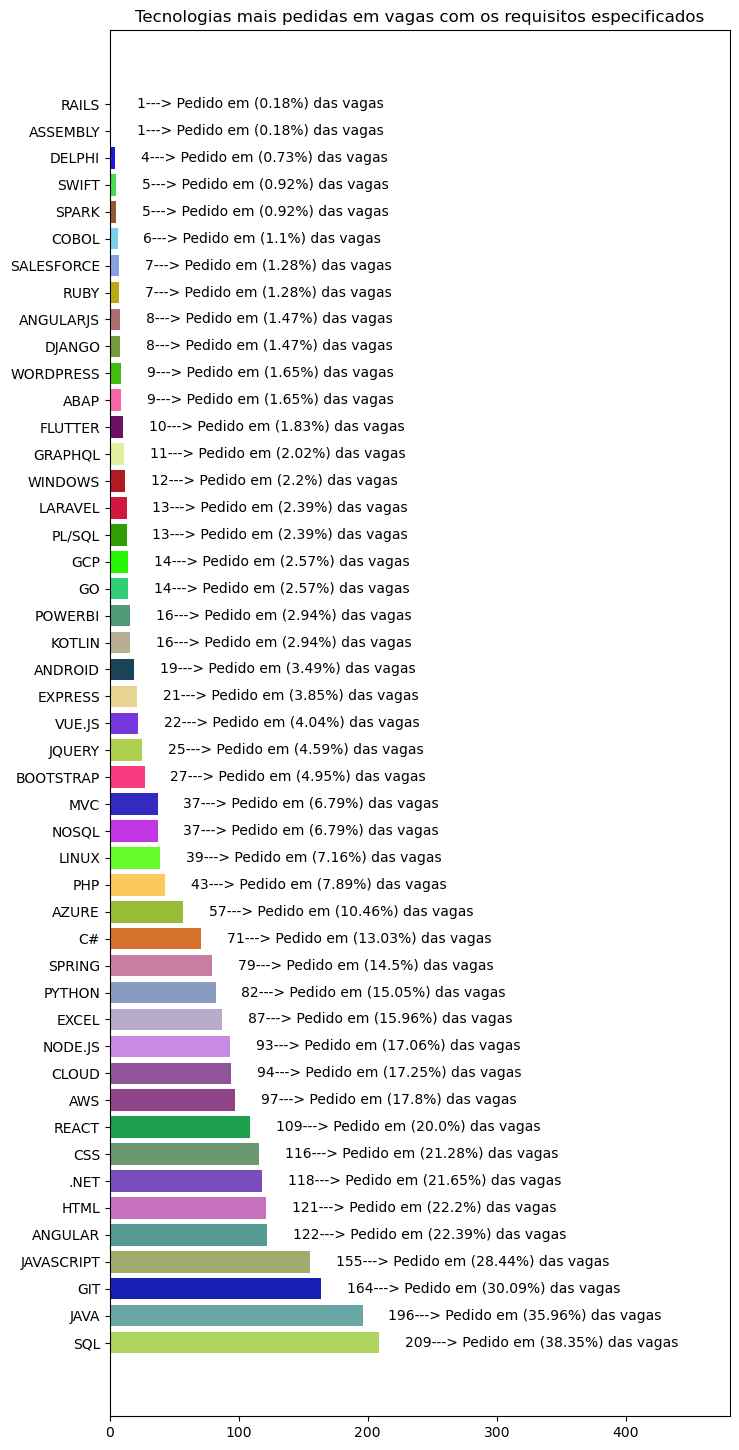

In [27]:
contagem_tecnologias = df.requisitos.value_counts()
cores = []
for _ in range(len(contagem_tecnologias)):
    cor = (random.random(), random.random(), random.random())
    cores.append(cor)
    
plt.figure(figsize=(8, 18))

bars = plt.barh(contagem_tecnologias.index, contagem_tecnologias, color=cores)
plt.title("Tecnologias mais pedidas em vagas com os requisitos especificados")

for bar, valor in zip(bars, contagem_tecnologias):
    plt.text(bar.get_width()+20, bar.get_y() + bar.get_height()/2, f'{valor}---> Pedido em ({round((valor / (len(df_temp))*100),2)}%) das vagas', ha='left', va='center')
plt.xlim(right=max(contagem_tecnologias) * 2.3)
plt.show()

In [195]:
print("TEMOS " + str(len(dados_nao_nulos[dados_nao_nulos.requisitos=='Não especificado'])) +" VAGAS SEM REQUISITOS ESPECIFICADOS")

TEMOS 144 VAGAS SEM REQUISITOS ESPECIFICADOS


In [196]:
# dados_nao_nulos = dados_nao_nulos.drop(columns=['lista'])

In [197]:
# dados_nao_nulos[dados_nao_nulos['requisitos'].str.contains("GIT")].loc[10].description

In [198]:
regex_str_posicao = 'Estagiário|Estagiario|Junior|Júnior|JR|Nivel 1|Nivel I|Nível 1|Nível I|Pleno/Sênior|Senior|Sênior|SR|Pleno|Tech Lead|Tech-lead|Diretor|Coordenador|Gerente'


In [199]:
#Buscar posicao no titulo da vaga
def busca_posicao(title):
    tecnologia =''
    if re.findall(regex_str_posicao, title,re.IGNORECASE) != []:
        tecnologia = re.findall(regex_str_posicao, title,re.IGNORECASE)[0].upper().replace(" ","").replace("-","")
    else: 
        tecnologia = "Não especificado"
        
    return tecnologia 

def busca_posicao_detalhe(title):
    tecnologia = ''
    tecnologias_encontradas = re.findall(regex_str_posicao, title, re.IGNORECASE)
    
    if tecnologias_encontradas:
        # Conta a frequência das tecnologias encontradas
        contador = Counter(tecnologias_encontradas)
        
        # Escolhe a tecnologia mais frequente
        tecnologia_mais_frequente = contador.most_common(1)[0][0].upper().replace(" ","").replace("-","")
        
        tecnologia = tecnologia_mais_frequente
    else: 
        tecnologia = "Não especificado"
        
    return tecnologia

def busca_posicao_descricao(title):
    tecnologia = ''
    tecnologias_encontradas = re.findall(regex_str_posicao, title, re.IGNORECASE)
    
    if tecnologias_encontradas:
        # Conta a frequência das tecnologias encontradas
        contador = Counter(tecnologias_encontradas)
        
        # Escolhe a tecnologia mais frequente
        tecnologia_mais_frequente = contador.most_common(1)[0][0].upper().replace(" ","").replace("-","")
        
        tecnologia = tecnologia_mais_frequente
    else: 
        tecnologia = "Não especificado"
        
    return tecnologia

In [200]:
dados_nao_nulos['posicao'] = dados_nao_nulos.title.apply(lambda x: busca_posicao(x))

In [201]:
dados_nao_nulos.loc[dados_nao_nulos['posicao']=='Não especificado','posicao']=dados_nao_nulos.experience_level.apply(lambda x: busca_posicao_detalhe(x))

In [202]:
dados_nao_nulos.loc[dados_nao_nulos['posicao']=='Não especificado','posicao']=dados_nao_nulos.description.apply(lambda x: busca_posicao_descricao(x))

In [203]:
dados_nao_nulos.loc[dados_nao_nulos['posicao'].isin(['SR', 'SENIOR']),'posicao']="SÊNIOR"
dados_nao_nulos.loc[dados_nao_nulos['posicao'].isin(['JR']),'posicao']="JUNIOR"
dados_nao_nulos.loc[dados_nao_nulos['posicao'].isin(['JÚNIOR']),'posicao']="JUNIOR"
dados_nao_nulos.loc[dados_nao_nulos['posicao'].isin(['NÍVELI','NÍVEL1']),'posicao']="JUNIOR"
dados_nao_nulos.loc[dados_nao_nulos['posicao'].isin(['TECH LEAD,TECH-LEAD']),'posicao']="TECH-LEAD"
dados_nao_nulos.loc[dados_nao_nulos['posicao'].isin(['ESTAGIÁRIO']),'posicao']="ESTAGIARIO"

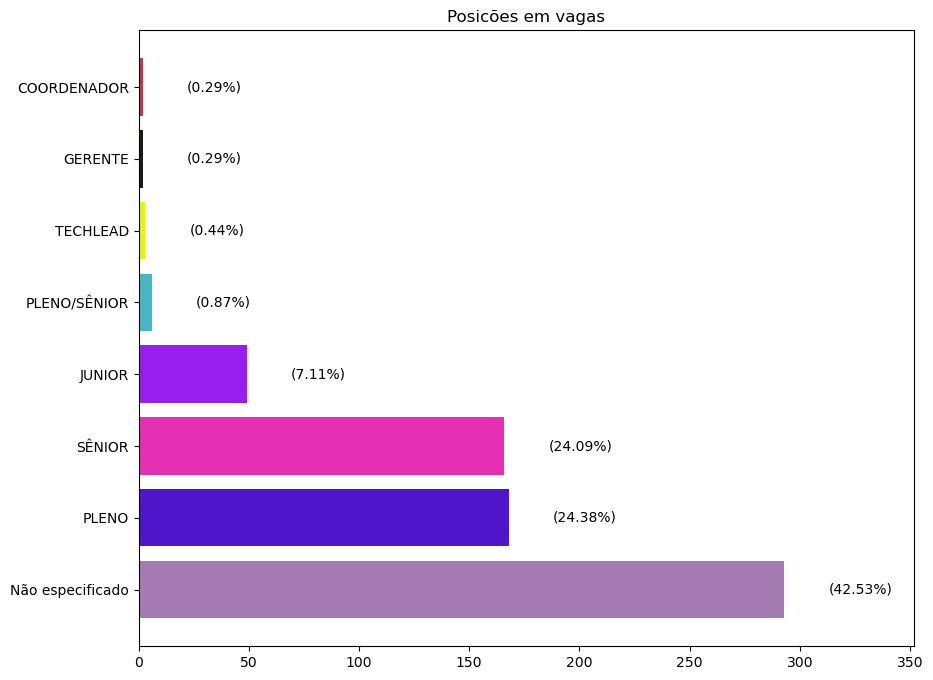

In [204]:
contagem_posicoes = dados_nao_nulos.posicao.value_counts()
cores = []
for _ in range(len(contagem_posicoes)):
    cor = (random.random(), random.random(), random.random())
    cores.append(cor)
    
plt.figure(figsize=(10, 8))

bars = plt.barh(contagem_posicoes.index, contagem_posicoes, color=cores)
plt.title("Posicões em vagas")

for bar, valor in zip(bars, contagem_posicoes):
    plt.text(bar.get_width()+20, bar.get_y() + bar.get_height()/2, f'({round((valor / (len(dados_nao_nulos.posicao)))*100,2)}%)', ha='left', va='center')
plt.xlim(right=max(contagem_posicoes) * 1.2)
plt.show()

In [205]:
dados_grafico2=dados_nao_nulos[(dados_nao_nulos.posicao!='Não especificado') & (dados_nao_nulos.requisitos!='Não especificado') & (dados_nao_nulos.posicao!="DIRETOR")& (dados_nao_nulos.posicao!="COORDENADOR")& (dados_nao_nulos.posicao!="ESTAGIARIO")& (dados_nao_nulos.posicao!="GERENTE")& (dados_nao_nulos.posicao!="TECHLEAD")& (dados_nao_nulos.posicao!="PLENO/SÊNIOR")]  


In [206]:
dados_explodidos = dados_grafico2.assign(requisitos=dados_grafico2['requisitos'].str.split(', ')).explode('requisitos')

# Em seguida, agrupe pelos valores da coluna 'posicao' e conte os valores da coluna 'requisitos' após a explosão
contagem_requisitos = dados_explodidos.groupby('posicao')['requisitos'].value_counts()

contagem_requisitos2 = dados_explodidos.groupby(['posicao', 'requisitos']).size()

# Use value_counts() e depois nlargest() para obter os 10 principais valores
top10_por_posicao = contagem_requisitos2.groupby(level=0).nlargest(10).reset_index(level=1, drop=True)

# Agora você tem a contagem de cada requisito para cada posição


[[ 7.  8.  0.  9.  8. 12. 12. 15. 14.  0.  9. 19.]
 [31. 31. 25. 30.  0. 46. 27. 40. 33.  0. 30. 62.]
 [ 0. 38. 37. 39.  0. 53. 39. 61. 49. 38. 40. 71.]]


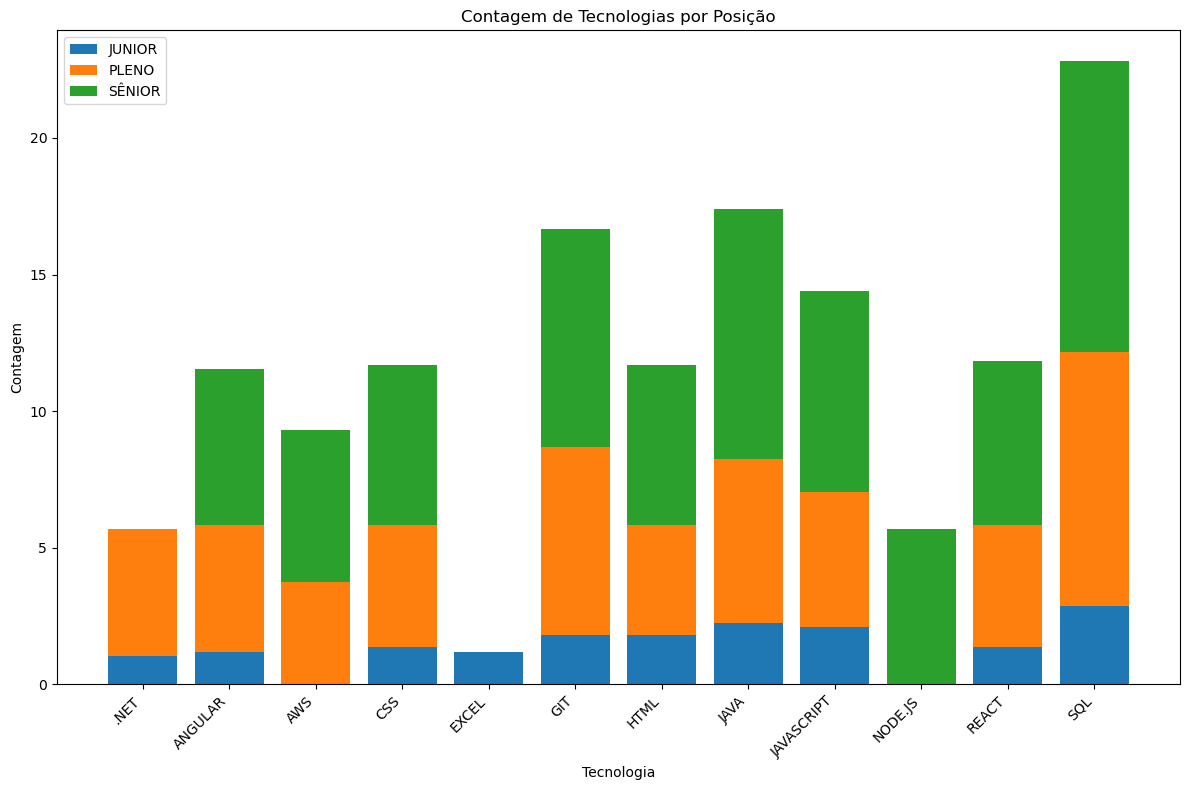

In [222]:
dados = top10_por_posicao

posicoes = sorted(set(posicao for posicao, _ in dados.keys()))
tecnologias = sorted(set(tecnologia for _, tecnologia in dados.keys()))

# Criar uma matriz de contagem de tecnologias para todas as posições
matriz_contagem = np.zeros((len(posicoes), len(tecnologias)))

# Preencher a matriz com as contagens reais
for i, posicao in enumerate(posicoes):
    for j, tecnologia in enumerate(tecnologias):
        matriz_contagem[i, j] = dados.get((posicao, tecnologia), 0)

# Criar o gráfico de barras empilhadas
plt.figure(figsize=(12, 8))
print(matriz_contagem)


total_vacancies = np.sum(matriz_contagem)

# Percentages for each position
percentages = np.array([0.2438, 0.15, 0.15])  # Junior, Pleno, Senior

# Calculate target number of vacancies for each position
target_vacancies = percentages * total_vacancies

# Adjust the vacancies in the matrix according to the target number of vacancies
adjusted_matrix = np.zeros_like(matriz_contagem)
for i in range(matriz_contagem.shape[0]):
    for j in range(matriz_contagem.shape[1]):
        position_percentage = matriz_contagem[i, j] / total_vacancies
        adjusted_matrix[i, j] = target_vacancies[i] * position_percentage    
        
bottom = np.zeros(len(tecnologias))
for i, posicao in enumerate(posicoes):
    plt.bar(tecnologias, adjusted_matrix[i], label=posicao, bottom=bottom)
    bottom += adjusted_matrix[i]


plt.xlabel('Tecnologia')
plt.ylabel('Contagem')
plt.title('Contagem de Tecnologias por Posição')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Mostrar o gráfico
plt.show()

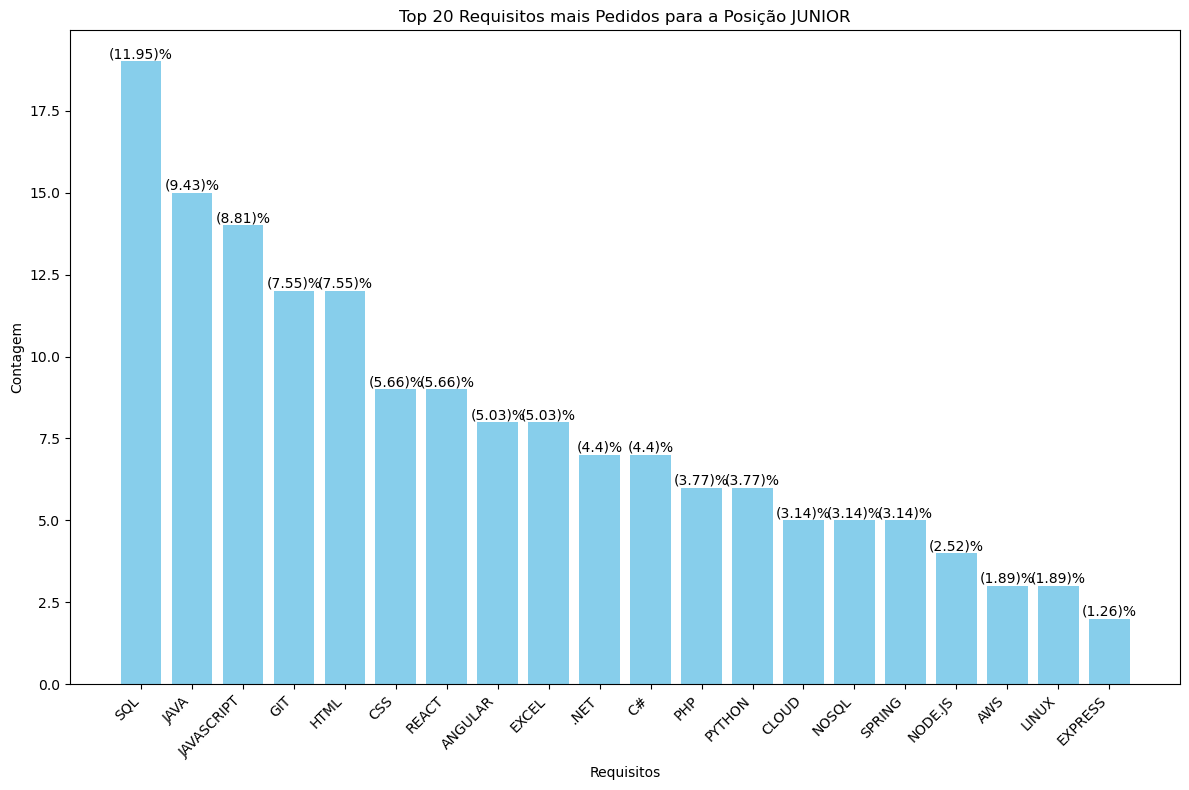

In [208]:
dados_junior = contagem_requisitos.loc['JUNIOR']

# Selecionar apenas os 10 primeiros requisitos mais pedidos
dados_junior_top10 = dados_junior.head(20)

# Criar o gráfico de barras
plt.figure(figsize=(12, 8))
bars=plt.bar(dados_junior_top10.index, dados_junior_top10.values, color='skyblue')

for bar, valor in zip(bars, dados_junior_top10.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'({round((valor/(dados_junior_top10.values.sum())*100),2)})%', ha='center', va='bottom')

plt.xlabel('Requisitos')
plt.ylabel('Contagem')
plt.title('Top 20 Requisitos mais Pedidos para a Posição JUNIOR')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

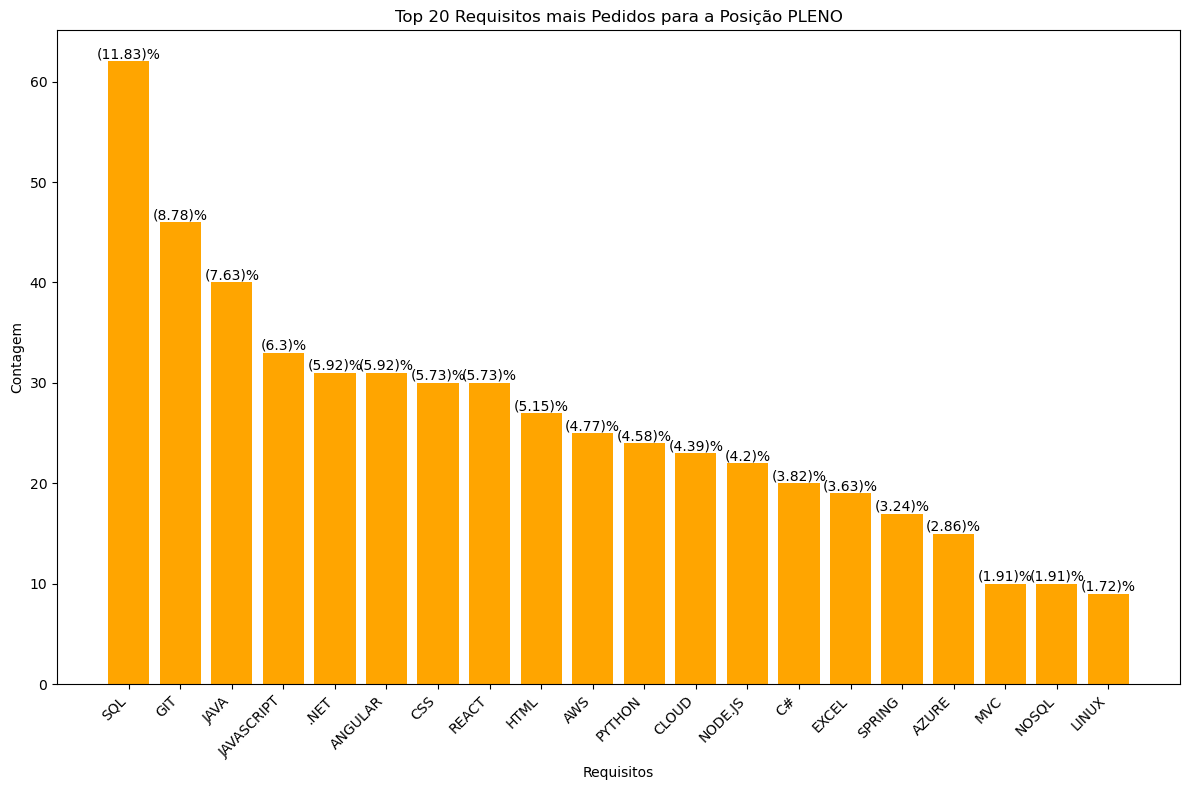

In [209]:
# Selecionar apenas os 10 primeiros requisitos mais pedidos
dados_pleno = contagem_requisitos.loc['PLENO']
dados_pleno_top10 = dados_pleno.head(20)

# Criar o gráfico de barras
plt.figure(figsize=(12, 8))
bars = plt.bar(dados_pleno_top10.index, dados_pleno_top10.values, color='orange')

for bar, valor in zip(bars, dados_pleno_top10.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'({round((valor/(dados_pleno_top10.values.sum())*100),2)})%', ha='center', va='bottom')

plt.xlabel('Requisitos')
plt.ylabel('Contagem')
plt.title('Top 20 Requisitos mais Pedidos para a Posição PLENO')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

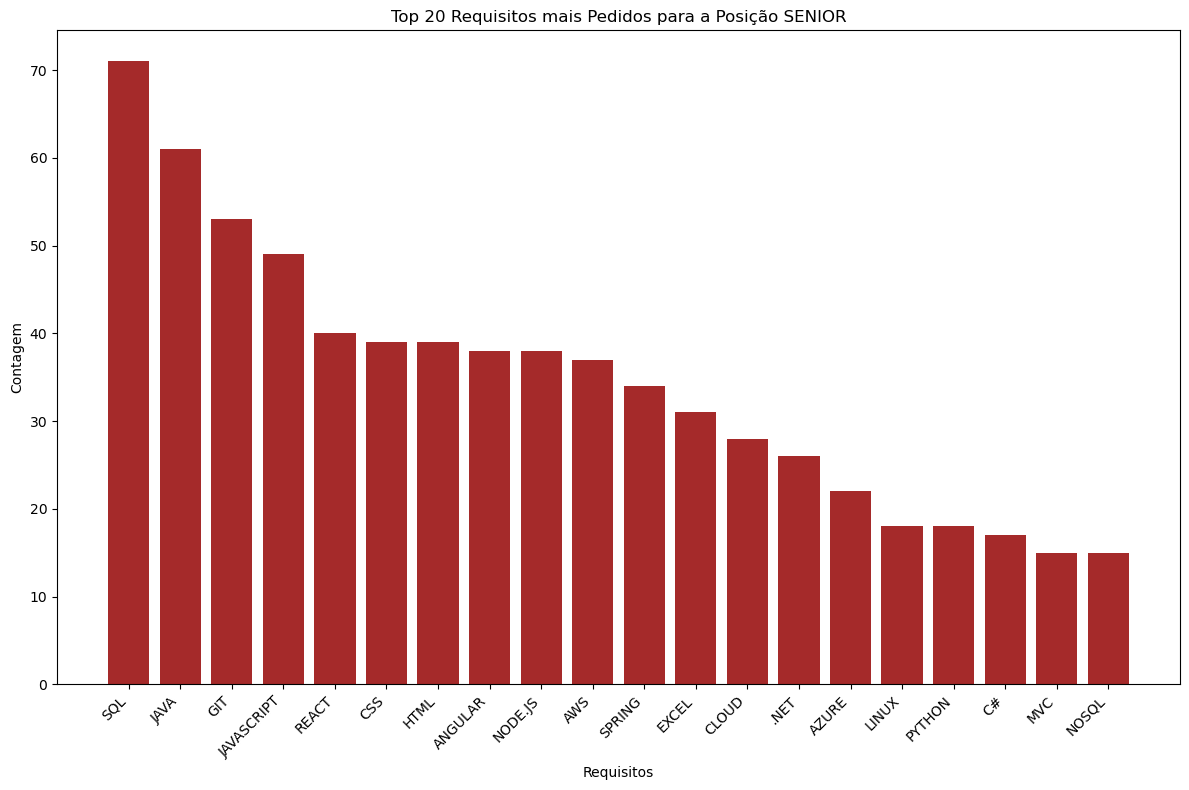

In [210]:
dados_senior = contagem_requisitos.loc['SÊNIOR']

# Selecionar apenas os 10 primeiros requisitos mais pedidos
dados_junior_top10 = dados_senior.head(20)

# Criar o gráfico de barras
plt.figure(figsize=(12, 8))
plt.bar(dados_junior_top10.index, dados_junior_top10.values, color='brown')
plt.xlabel('Requisitos')
plt.ylabel('Contagem')
plt.title('Top 20 Requisitos mais Pedidos para a Posição SENIOR')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [211]:
dados_nao_nulos.drop(columns=['lista'], inplace=True)

In [212]:
vagas_junior=dados_nao_nulos[dados_nao_nulos.posicao=="JUNIOR"]

In [213]:
vagas_junior.to_excel("vagas_junior.xlsx")

PermissionError: [Errno 13] Permission denied: 'vagas_junior.xlsx'

In [ ]:
dados_nao_nulos